In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)

## 1. Исходные данные
X1 ~ R(5, 15), n1 = 100\
X2 ~ N(10, 5), n2 = 100\
X3 ~ N(10, 2), n3 = 100\
X4 ~ N(10, 5), n4 = 100

In [ ]:
#Для удобства хранения выборочных значений

class describer():
  def __init__(self, X):
    self.X = X
    self.s = np.var(X, ddof=1)**(1/2)
    self.m0 = np.mean(X)
    self.s2 = np.var(X, ddof=1)
    self.n = len(X)

  def describe(self):
    return {'n': self.n, 'm': self.m0, 's^2': self.s2, 's': self.s}

  def get_s(self):
    return self.s

  def get_s2(self):
    return self.s2

  def get_m0(self):
    return self.m0

  def get_n(self):
    return self.n

In [ ]:
#X1
np.random.seed(42)
a, b = 5, 15
m1 = (15 - 5)/2
std1 = (((15-5)**2)/12)**(1/2)
n1 = 100
X1 = np.random.uniform(a, b, size = n1)
X1_samples = describer(X1)
X1_samples.describe()


{'n': 100,
 'm': 9.701807433782093,
 's^2': 8.849994966624154,
 's': 2.9748941101531923}

In [ ]:
#X2
np.random.seed(42)
m2 = 10
std2 = 5
n2 = 100
X2 = np.random.randn(n2)*std2 + m2
X2_samples = describer(X2)
X2_samples.describe()

{'n': 100,
 'm': 9.48076741302953,
 's^2': 20.619247340754,
 's': 4.540842140039004}

In [ ]:
#X3
np.random.seed(42)
m3 = 10
std3 = 2
n3 = 100
X3 = np.random.randn(n3)*std3 + m3
X3_samples = describer(X3)
X3_samples.describe()

{'n': 100,
 'm': 9.792306965211813,
 's^2': 3.29907957452064,
 's': 1.8163368560156015}

In [ ]:
#X4
np.random.seed(32)
m4 = 10
std4 = 5
n4 = 100
X4 = np.random.randn(n4)*std4 + m4
X4_samples = describer(X4)
X4_samples.describe()

{'n': 100,
 'm': 10.318429778923212,
 's^2': 26.716522776907567,
 's': 5.16880283788302}

In [ ]:
Pooled = np.array([X1, X2, X3, X4]).flatten()
Pooled_samples = describer(Pooled)
Pooled_samples.describe()

{'n': 400,
 'm': 9.823327897736661,
 's^2': 14.85418528623308,
 's': 3.8541127754949103}

## 2. Визуальное представление выборок

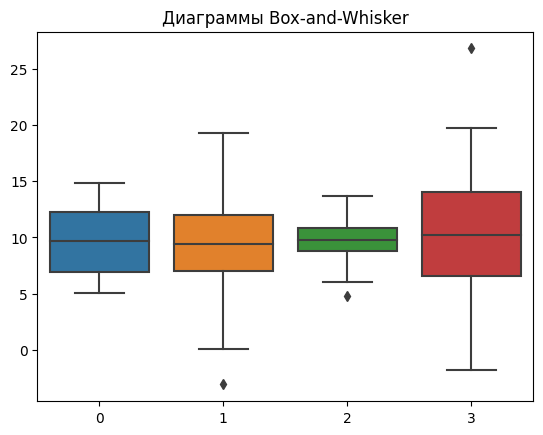

In [ ]:
sns.boxplot(data=[X1, X2, X3, X4]).set_title('Диаграммы Box-and-Whisker');

## 3. Проверка условия применимости дисперсионного анализа

a = 0.05

### Статистическая гипотеза:
H0: std1 = std2 = std3 = std4

Критерий Бартлетта

In [ ]:
st.bartlett(X1, X2, X3, X4)
# Отклоняем при pvalue < a = 0.05

BartlettResult(statistic=109.6405332329374, pvalue=1.3112774689872379e-23)

## 4. Однофакторный дисперсионный анализ

In [ ]:
#Найдем межгрупповую дисперсию
samples = [X1_samples, X2_samples, X3_samples, X4_samples]
Dm = np.sum([x.get_n()*((x.get_m0() - Pooled_samples.get_m0())**2)/len(Pooled) for x in samples])
# несмещенная оценка
Dm = Dm*(Pooled_samples.get_n()/(4 - 1))
Dm

12.606769328389682

In [ ]:
#Внутригрупповую дисперсию
Dv = np.sum([x.get_n()*x.get_s2()/Pooled_samples.get_n() for x in samples])
# несмещенная оценка
Dv = Dv*(Pooled_samples.get_n()/(Pooled_samples.get_n() - 4))
Dv

15.021425418890496

In [ ]:
#коэффициент детерминации(ЭКД) и Эмпирическое корреляционное отношение(ЭКО)
n_deter2 = Dm / (Dm + Dv)
n_deter = n_deter2**(1/2)
n_deter, n_deter2

(0.6755004596874352, 0.4563008710379363)

H0: m1 = m2 = m3 = m4

In [ ]:
st.f_oneway(X1, X2, X3, X4)
#Высокое pvalue => принимаем H0

F_onewayResult(statistic=0.8477298310653492, pvalue=0.46841744790623596)

## 5. Метод линейных контрастов

In [ ]:
len(X3)

100

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
f, p = f_oneway(X1, X2, X3, X4)
p
# Хотя p высокое и мы уже приняли гипотезу о равентсве мат ожиданий. Посмотрим на мето линейных контрастов

0.46841744790623596

In [ ]:
df = pd.DataFrame({'score': np.array([X1, X2, X3, X4]).flatten() ,
 'group': np.repeat(['X1', 'X2', 'X3', 'X4' ], repeats= 100)})

tukey = pairwise_tukeyhsd(endog=df['score'],
  groups=df['group'],
  alpha= 0.05 )

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    X1     X2   -0.221 0.9775 -1.6281  1.186  False
    X1     X3   0.0905 0.9984 -1.3165 1.4975  False
    X1     X4   0.6166 0.6708 -0.7904 2.0237  False
    X2     X3   0.3115 0.9406 -1.0955 1.7186  False
    X2     X4   0.8377  0.417 -0.5694 2.2447  False
    X3     X4   0.5261 0.7696 -0.8809 1.9332  False
---------------------------------------------------


<ipython-input-57-b2160b8e9dd9>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper), (c, c),'ro-',color='orange');


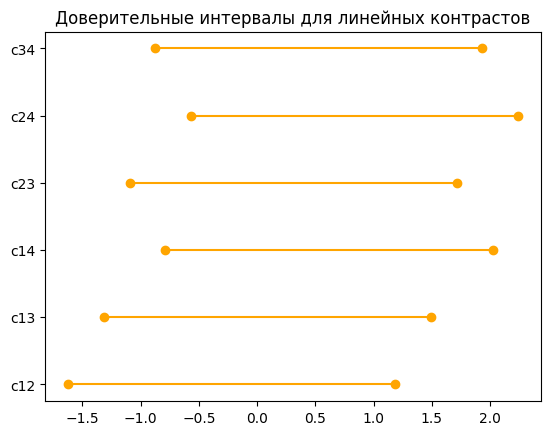

In [ ]:
c = ['c12', 'c13', 'c14', 'c23', 'c24', 'c34']
plt.title('Доверительные интервалы для линейных контрастов')
for i, c in enumerate(c):
  lower, upper = tukey.confint[i]
  plt.plot((lower,upper), (c, c),'ro-',color='orange');
